## Disease model

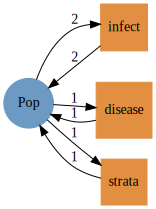

In [1]:
using AlgebraicPetri, AlgebraicPetri.TypedPetri
using Catlab.CategoricalAlgebra

const infectious_ontology = LabelledPetriNet(
  [:Pop],
  :infect=>((:Pop, :Pop)=>(:Pop, :Pop)),
  :disease=>(:Pop=>:Pop),
  :strata=>(:Pop=>:Pop)
)

Graph(infectious_ontology)

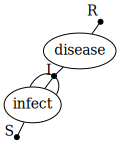

In [2]:
using Catlab.Programs, Catlab.Graphics

sir_uwd = @relation () where (S::Pop, I::Pop, R::Pop) begin
  infect(S,I,I,I) # inf
  disease(I,R) # rem
end

typed_sir = oapply_typed(infectious_ontology, sir_uwd, [:inf, :rem])

to_graphviz(sir_uwd, box_labels=:name, junction_labels=:variable)

## Stratified with 3 age groups

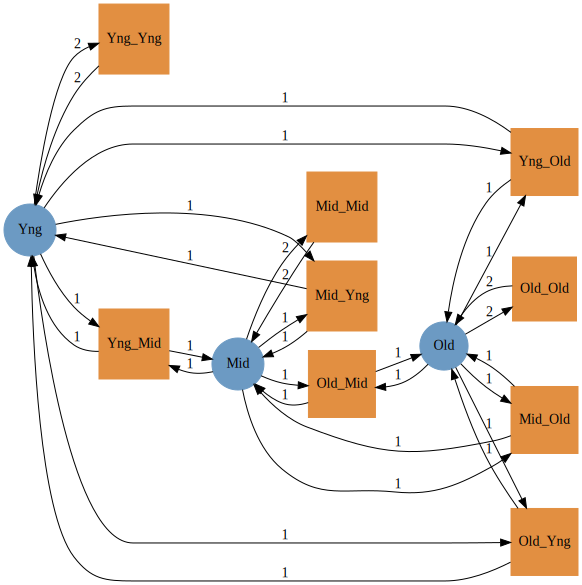

In [3]:
typed_age = pairwise_id_typed_petri(infectious_ontology, :Pop, :infect,
                                    [:Yng, :Mid, :Old])

Graph(dom(typed_age))

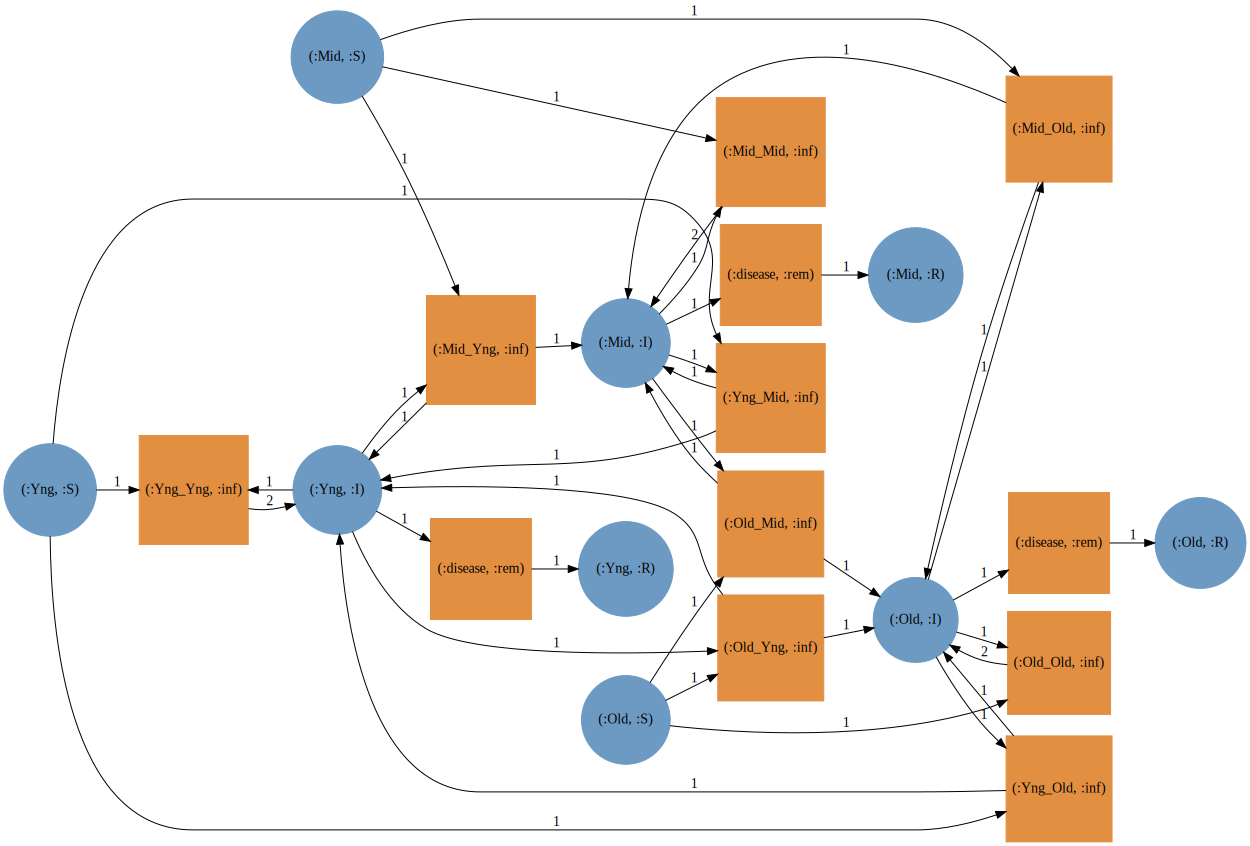

In [4]:
typed_age_aug = add_reflexives(
  typed_age,
  [[:disease], [:disease], [:disease]],
  infectious_ontology
)

typed_sir_aug = add_reflexives(
  typed_sir,
  [[:strata], [:strata], [:strata]],
  infectious_ontology
)

stratified = typed_product(typed_age_aug, typed_sir_aug)

Graph(dom(stratified))

In [5]:
write_json_acset(dom(stratified), "scenario1_stratified_model_n3.json")

1237

## Stratified with 16 age groups

In [6]:
n = 16
names = [Symbol("Age$i") for i in 1:n]
typed_age = pairwise_id_typed_petri(infectious_ontology, :Pop, :infect, names)

typed_age_aug = add_reflexives(
  typed_age,
  [[:disease], [:disease], [:disease]],
  infectious_ontology
)

stratified = typed_product(typed_age_aug, typed_sir_aug)
net = dom(stratified)
(S = ns(net), T = nt(net))

(S = 48, T = 259)

In [7]:
write_json_acset(net, "scenario1_stratified_model_n16.json")

28132